In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [14]:
data= pd.read_csv("C:/Users/sharm/Downloads/USvideos.csv")

In [17]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [19]:
data.shape

(40949, 16)

In [21]:
data= data.drop_duplicates()
data.shape

(40901, 16)

In [23]:
data.describe()


,category_id,views,likes,dislikes,comment_count
count,40901.000000,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04
mean,19.970588,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03
std,7.569362,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02
50%,24.000000,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03
75%,25.000000,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  thumbnail_link          40901 non-null  object
 12  comments_disabled       40901 non-null  bool  
 13  ratings_disabled        40901 non-null  bool  
 14  video_error_or_removed  40901 non-null  bool  
 15  descrip

In [27]:
#removing two columns thumbnail_link and description
columns_to_remove = ['thumbnail_link','description']
data= data.drop(columns=columns_to_remove)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  comments_disabled       40901 non-null  bool  
 12  ratings_disabled        40901 non-null  bool  
 13  video_error_or_removed  40901 non-null  bool  
dtypes: bool(3), int64(5), object(6)
memory usage: 3.9+ MB


In [29]:
#changing datetime format
from datetime import datetime
import datetime

In [35]:
#check format of 'trending_date' column
print(data['trending_date'].dtype)

if data["trending_date"].dtype != 'datetime64[ns]':
    data['trending_date']= pd.to_datetime(data['trending_date'], format= '%y.%d.%m')
data.head()

datetime64[ns]


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False


In [43]:
#changing publish_time to proper datetime column 
data['publish_time'] = pd.to_datetime(data['publish_time'])
data.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False


In [51]:
#making 3 new columns
data['publish_month']=data['publish_time'].dt.month
data['publish_day']=data['publish_time'].dt.day
data['publish_hour']=data['publish_time'].dt.hour
data.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_month,publish_day,publish_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,11,13,17
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,11,13,7
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,11,12,19


In [55]:
print(sorted(data['category_id'].unique()))
[1, 2, 10, 15, 17, 19, 20, 222, 23, 24, 25, 26, 27, 28, 29,30, 43]

[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43]


[1, 2, 10, 15, 17, 19, 20, 222, 23, 24, 25, 26, 27, 28, 29, 30, 43]

In [61]:
#creating new column'column_name 
data['category_name']=np.nan
data.loc[(data['category_id']==1), "category_name"] = 'Film and Animation' 
data.loc[(data['category_id']==2), "category_name"] = 'Autos and vehicles' 
data.loc[(data['category_id']==10), "category_name"] = 'Music'
data.loc[(data['category_id']==15), "category_name"] = 'Pets and Animals'
data.loc[(data['category_id']==17), "category_name"] = 'Sports'
data.loc[(data['category_id']==19), "category_name"] = 'travel and events'
data.loc[(data['category_id']==20), "category_name"] = 'gaming'
data.loc[(data['category_id']==22), "category_name"] = 'people and blogs'
data.loc[(data['category_id']==23), "category_name"] = 'comedy'
data.loc[(data['category_id']==24), "category_name"] = 'entertainment'
data.loc[(data['category_id']==25), "category_name"] = 'news and politics'
data.loc[(data['category_id']==26), "category_name"] = 'how to and style'
data.loc[(data['category_id']==27), "category_name"] = 'education' 
data.loc[(data['category_id']==28), "category_name"] = 'science and technology' 
data.loc[(data['category_id']==29), "category_name"] = 'non profits and activitism'
data.loc[(data['category_id']==30), "category_name"] = 'movies' 
data.loc[(data['category_id']==43), "category_name"] = 'shows'
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_month,publish_day,publish_hour,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,11,13,17,people and blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,11,13,7,entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,11,12,19,comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,11,13,11,entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False,11,12,18,entertainment


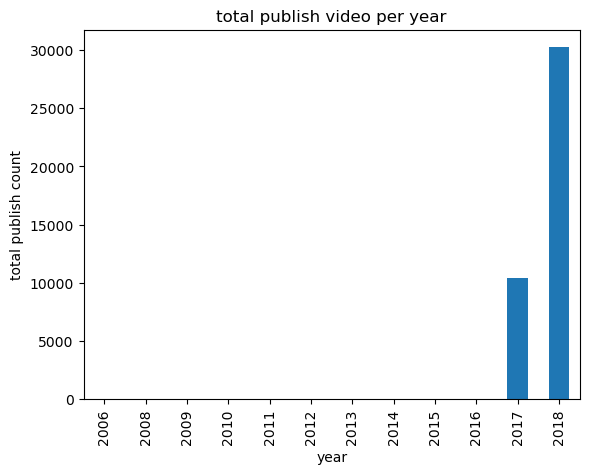

In [63]:
data['year']=data['publish_time'].dt.year
yearly_counts= data.groupby('year')['video_id'].count()
#create a bar chart
yearly_counts.plot(kind='bar',xlabel='year',ylabel='total publish count',title='total publish video per year')
 #show chart
plt.show()

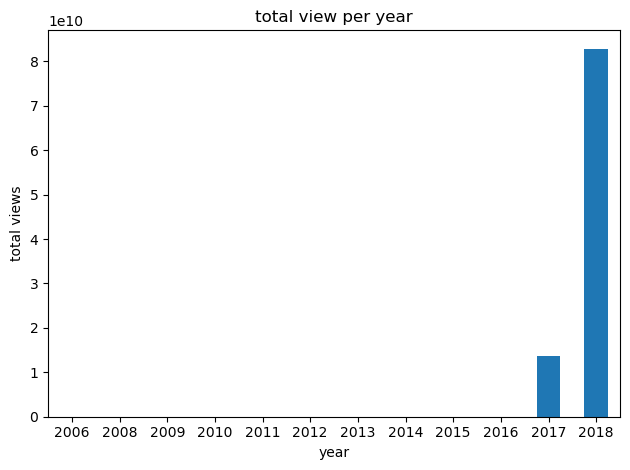

In [65]:
yearly_views= data.groupby('year')['views'].sum()
#create a bar chart
yearly_views.plot(kind='bar',xlabel='year',ylabel='total views',title='total view per year')
plt.xticks(rotation=0)
plt.tight_layout() 
 #show chart
plt.show()

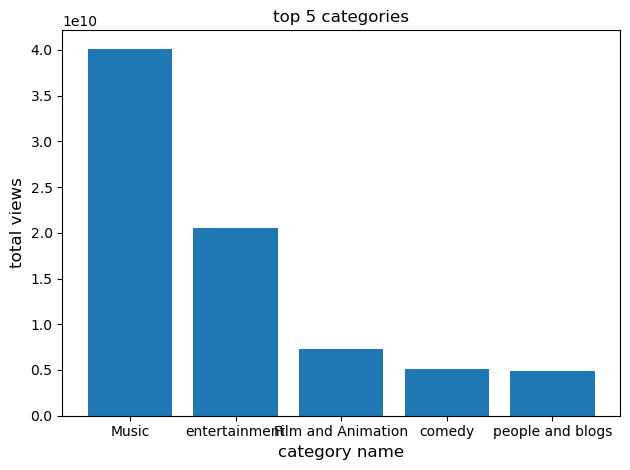

In [67]:
#grouping data by 'category_name and calculating sum of 'views' in each category
category_views= data.groupby('category_name')['views'].sum().reset_index()
#sort the categories by views in descending values
top_categories = category_views.sort_values(by='views', ascending=False).head()
#creating a bar plot to visualize the top 5 categories
plt.bar(top_categories['category_name'],top_categories['views'])
plt.xlabel('category name', fontsize=12)
plt.ylabel('total views', fontsize=12)
plt.title('top 5 categories',fontsize=12)
plt.tight_layout()
plt.show()

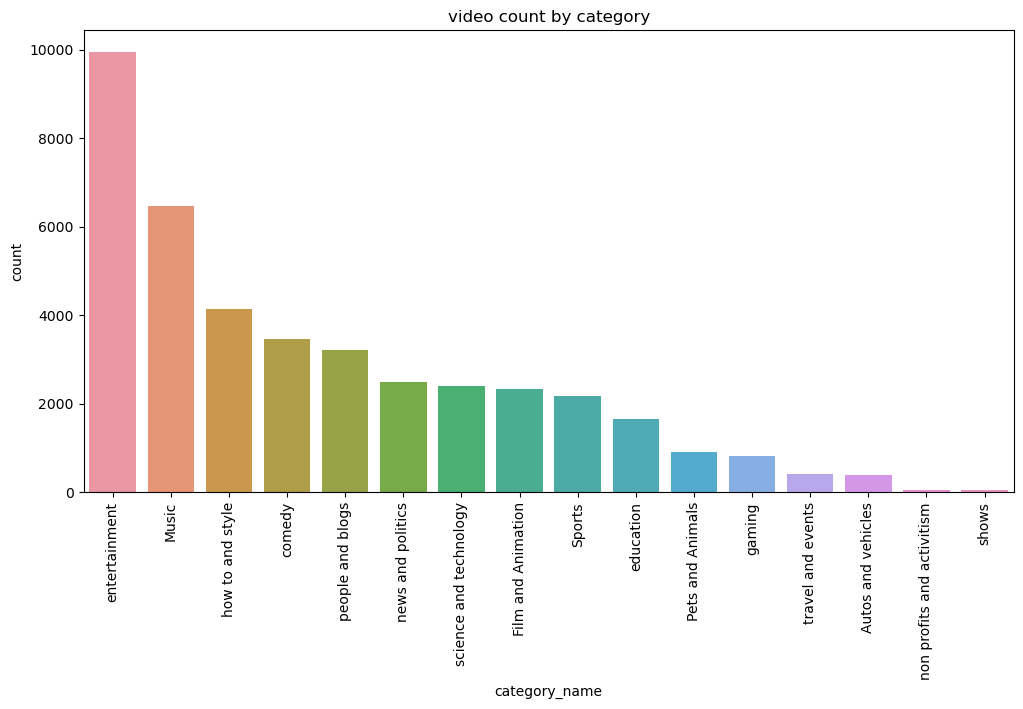

In [73]:
plt.figure(figsize=(12,6))
sns.countplot(x='category_name', data=data,order=data['category_name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('video count by category')
plt.show()

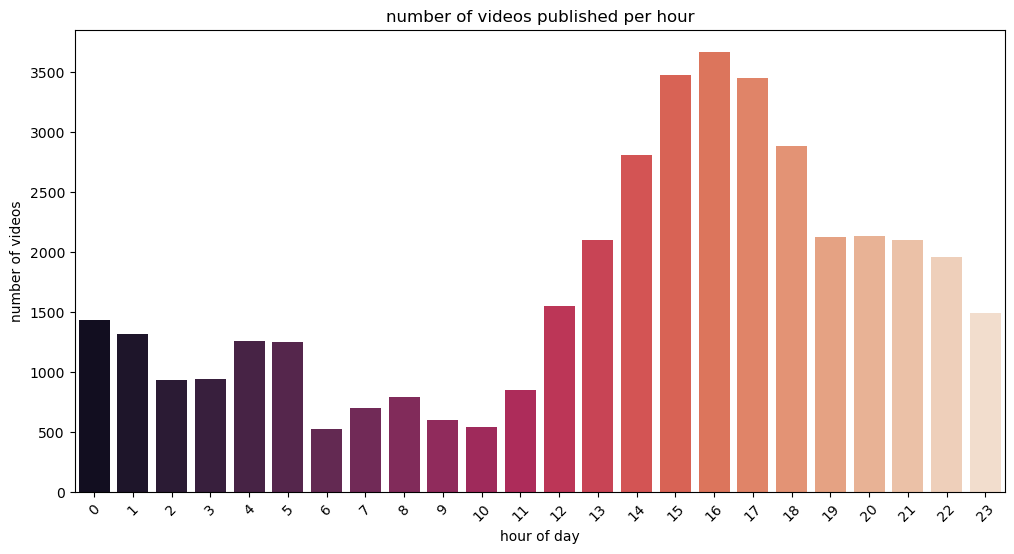

In [75]:
#counting the number of videos published per hours
videos_per_hour =data['publish_hour'].value_counts().sort_index()
#creating bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=videos_per_hour.index,y=videos_per_hour.values, palette='rocket')
plt.xlabel('hour of day')
plt.ylabel('number of videos')
plt.title('number of videos published per hour')
plt.xticks(rotation=45)
plt.show()
           

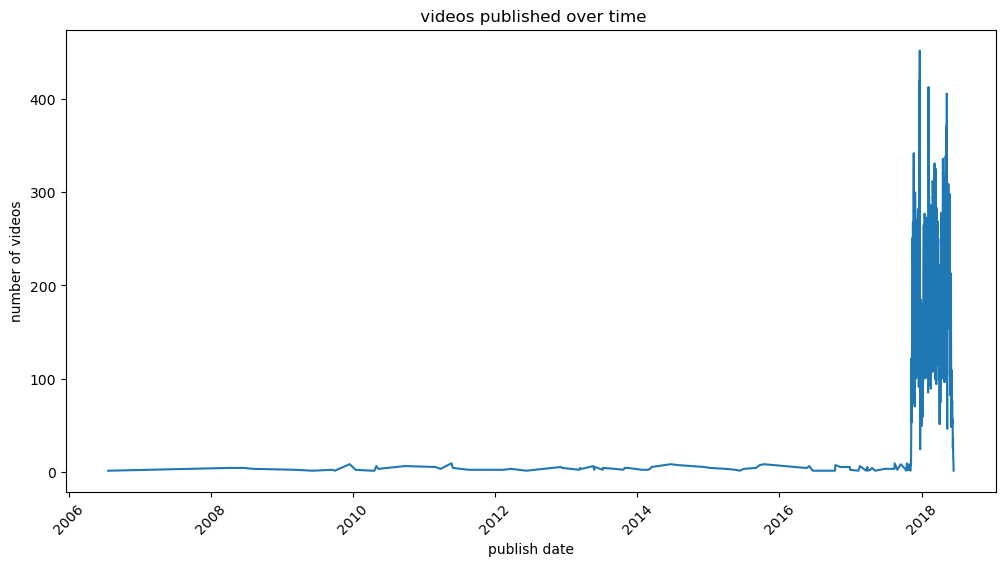

In [77]:
data['publish_time']=pd.to_datetime(data['publish_time'])
data['publish_date']=data['publish_time'].dt.date
video_count_by_date=data.groupby('publish_date').size()
plt.figure(figsize=(12,6))
sns.lineplot(data=video_count_by_date)
plt.xlabel('publish date')
plt.ylabel('number of videos')
plt.title(' videos published over time')
plt.xticks(rotation=45)
plt.show()

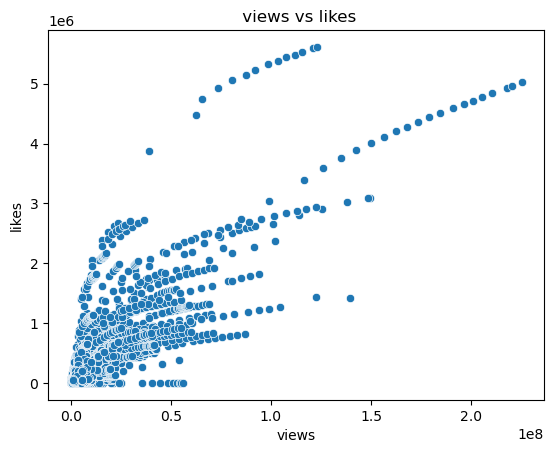

In [79]:
#creating scatterplot between 'views' and 'likes'
sns.scatterplot(data=data, x='views', y='likes')
plt.xlabel('views')
plt.ylabel('likes')
plt.title(' views vs likes')
plt.show()

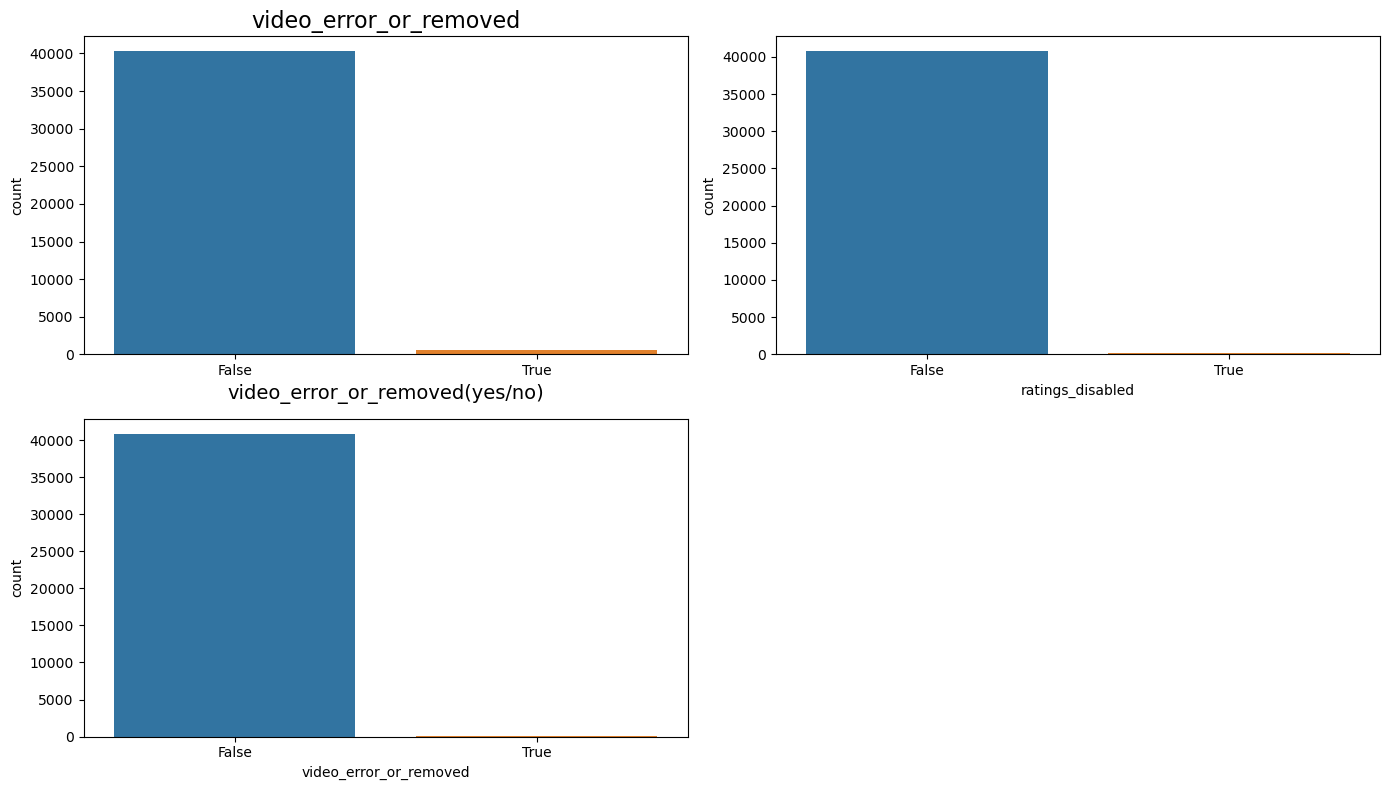

In [95]:
plt.figure(figsize=(14,8))
plt.subplots_adjust(wspace=0.2, hspace=0.4, top=0.9)
plt.subplot(2,2,1)
g=sns.countplot(x='comments_disabled',data=data)
g.set_title('comments_disabled', fontsize=16)
g.set_xlabel('comments_disabled(yes/no)', fontsize=14)
plt.subplot(2,2,2)
g1=sns.countplot(x='ratings_disabled', data=data)
g.set_title('ratings_disabled', fontsize=16)
g.set_xlabel('ratings_disabled(yes/no)', fontsize=14)
plt.subplot(2,2,3)
g2=sns.countplot(x='video_error_or_removed', data=data)
g.set_title('video_error_or_removed', fontsize=16)
g.set_xlabel('video_error_or_removed(yes/no)', fontsize=14)
plt.tight_layout()
plt.show()